# K Nearest Neighbours

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

We'll be working iwth real life interview scenarios wee we may not know what the data represets

In [2]:
df = pd.read_csv("Classified Data", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Scaling

Scales data with a mean of 0, so it places every points on hwo far away from 0 they are.
Mean = 0, and Standard deviation = 1

- **Standardization**: Centers the data to have a mean of 0 and a standard deviation of 1.
  - `scaler = StandardScaler()`
  - `scaled_data = scaler.fit_transform(data)`

- **Min-Max Scaling**: Transforms the data to be within a specified range, typically 0 to 1.
  - `scaler = MinMaxScaler()`
  - `scaled_data = scaler.fit_transform(data)`

- **Robust Scaling**: Scales the data using statistics that are robust to outliers, such as the median and the interquartile range.
  - `scaler = RobustScaler()`
  - `scaled_data = scaler.fit_transform(data)`

We have to use these anonymous data's to classify them into a Target Class.

We may need to STANDARDISE everything to the same scale 

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
'''
INSTEAD OF ALWAYS DROPPING INSIDE OF FITS AND TRANSFORM YOU MAY INSTEAD SPLIT


features = df.drop('TARGET CLASS')
target = df['TARGET CLASS']

scaler = StandardScaler()

scaler.fit(features)
scaled_array = scaler.transform(features) #returns array

scaled_features = pd.DataFrame(scaled_array, columns=features.columns) #dataframe

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
'''

"\nINSTEAD OF ALWAYS DROPPING INSIDE OF FITS AND TRANSFORM YOU MAY INSTEAD SPLIT\n\n\nfeatures = df.drop('TARGET CLASS')\ntarget = df['TARGET CLASS']\n\nscaler = StandardScaler()\n\nscaler.fit(features)\nscaled_array = scaler.transform(features) #returns array\n\nscaled_features = pd.DataFrame(scaled_array, columns=features.columns) #dataframe\n\nX_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)\n"

In [6]:
# scale everythign besides the target class
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
#use it to now traform
scaled_feautures = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
#back into a df
df_feat =  pd.DataFrame(scaled_feautures, columns=df.columns[:-1])

#[:-1] eveything but last one, as we dont have target class in scaled features
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [9]:
X = df_feat #you can also just pass in scaled_features
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#state a starting n_neighbours (k)
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        86
           1       0.89      0.89      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

[[ 74  12]
 [ 12 102]]


We can see that with k=1 our model is pretty good already 

We can use the elbow method to chose a better k value

ERROR RATE: np.mean(pred != y_test)
gets number and mean of all of the ones where the prediction is wrong

In [16]:
error_rate = [] #empty list

#we will test all k values from 1 to 40, and test for which has lowest error rate
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

error_rate.index(min(error_rate)) #we get 8, thus k=8 is best k to chose

8

([<matplotlib.axis.XTick at 0x11b8c8304d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39')])

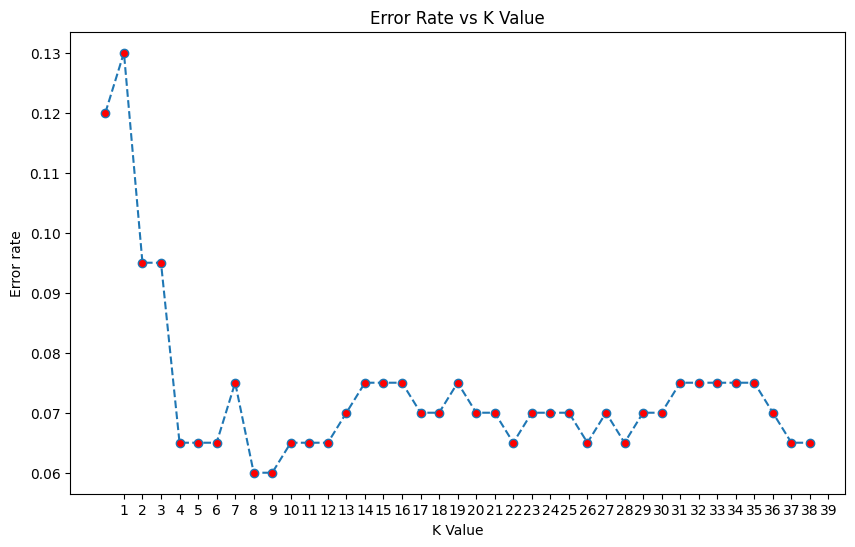

In [17]:
plt.figure(figsize=(10,6))
plt.plot(error_rate, linestyle='--', marker='o', markerfacecolor='red')

plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error rate')

plt.xticks(range(1,40))

In [18]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 79   7]
 [  8 106]]


              precision    recall  f1-score   support

           0       0.91      0.92      0.91        86
           1       0.94      0.93      0.93       114

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



Extra 5% accuracy